In [1]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter, get_impulse_response
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "spice/circuit.asc"


Found Numpy. WIll be used for storing data


In [2]:
## time range

# our samples shall be 100 ms wide
sample_width=500e-9
# time step between samples: 0.1 ms
delta_t=0.1e-9
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)

In [3]:
##################################################
##      apply filter - get impulse response     ##
##################################################

# all values in SI units
configuration_1 = {
  "r_rise":100,
  "r_tail":100
}

dummy, filter_sr = apply_ltspice_filter(
      circuit_file,
      time,
      time, ## we don't care about input data
      params=configuration_1,
      ltspice_command = ltspice_command
      )


sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


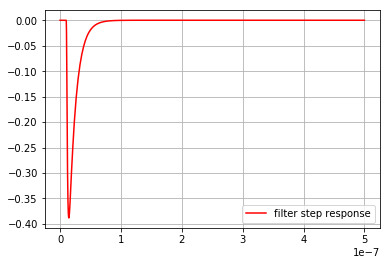

In [4]:
##################################################
##              plot step response              ##
##################################################


plt.plot(time,filter_sr,"r",label="filter step response")
plt.legend()
plt.grid(True)
plt.show()

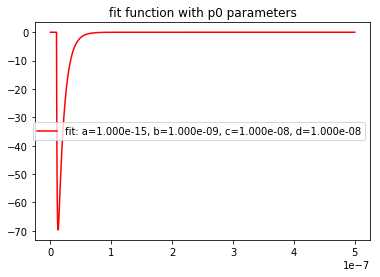

In [5]:
##################################################
##    fit circuit parameters to test signal     ##
##################################################


def func(x, a, b, c, d):
    
    x_ = x-d
    return (x>d)*a/(b*c)*(np.exp(-x_/b)-np.exp(-x_/c))


# start parameters and parameter bounds
#          a       b(C1)  c(C2)
p0  =    [1e-15,1e-9 ,10e-9,10e-9]
#param_bounds=(
#         [0     ,0      ,0      ],
#         [100   ,2000e-6,2000e-6])




#plt.plot(time,filter_sr, label="original signal")
#plt.plot(time, func(time, *popt), 'r-',
plt.plot(time, func(time, *p0), 'r-',
         label='fit: a=%5.3e, b=%5.3e, c=%5.3e, d=%5.3e' % tuple(p0))
#plt.grid(True)
#plt.ylim(-0.5, 2)
plt.title("fit function with p0 parameters")
plt.legend()
plt.show()

In [6]:
## fit
popt, pcov = curve_fit(func, time, filter_sr, p0 = p0)#, bounds=param_bounds)


<IPython.core.display.Javascript object>


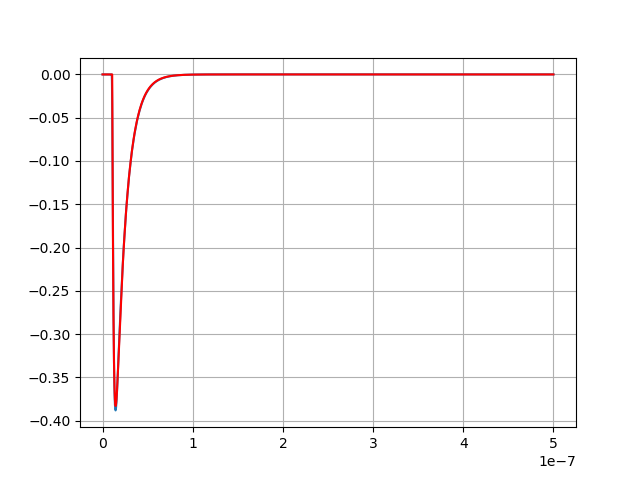

fit: a=1.180e-17, b=1.682e-09, c=1.109e-08, d=1.075e-08


In [7]:
##################################################
##         plot fit against input data          ##
##################################################

%matplotlib notebook
plt.plot(time,filter_sr, label="original signal")
plt.plot(time, func(time, *popt), 'r-',
#plt.plot(time, func(time, *p0), 'r-',
         label='fit: a=%5.3e, b=%5.3e, c=%5.3e, d=%5.3e' % tuple(popt))
plt.grid(True)
#plt.ylim(-0.5, 2)
#plt.legend()
plt.show()

print('fit: a=%5.3e, b=%5.3e, c=%5.3e, d=%5.3e' % tuple(popt))
